In [1]:
from patchedimage import PatchedImage
from utilities import *

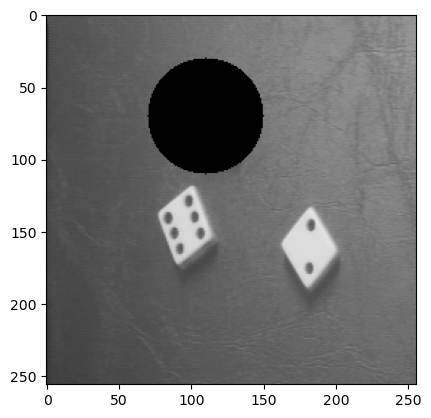

In [2]:
imgp = PatchedImage("images/dice1.tif",3)
masque = masque_circulaire((70,110),40,imgp.img.shape)
imgp.set_masque(leaf_size=128,draw=False,masque=masque)
imgp.set_priorities()
imgp.show_img()


In [ ]:
imgp.reconstruction_auto(display_img=True)
imgp.show_img()

In [21]:
"""
plt.imshow(imgp.zone)
plt.colorbar()
plt.show()
plt.imshow(imgp.gradient[0])
plt.colorbar()
plt.show()
plt.imshow(imgp.gradient[1])
plt.colorbar()
plt.show()
"""

'\nplt.imshow(imgp.zone)\nplt.colorbar()\nplt.show()\nplt.imshow(imgp.gradient[0])\nplt.colorbar()\nplt.show()\nplt.imshow(imgp.gradient[1])\nplt.colorbar()\nplt.show()\n'

In [22]:
"""
i,j = imgp.find_max_priority()
imgp.reconstruction((i,j))
imgp.set_priorities()
plt.imshow(imgp.zone)
"""

'\ni,j = imgp.find_max_priority()\nimgp.reconstruction((i,j))\nimgp.set_priorities()\nplt.imshow(imgp.zone)\n'

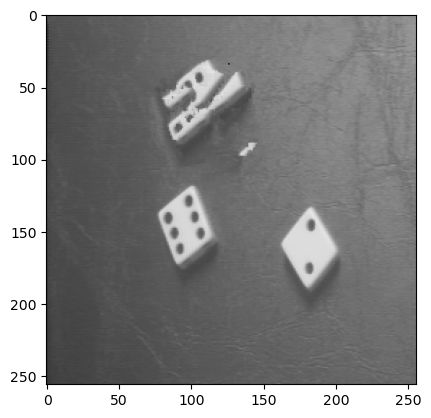

In [23]:
imgp.show_img()